In [1]:
! pip install matplotlib

In [16]:
import csv
import matplotlib.pyplot as plt

In [5]:
f = 'fire_sim.csv'
rows = []
with open(f, 'r') as csvfile: 
    csvreader = csv.reader(csvfile) 
    for row in csvreader:
        rows.append(row)
print(len(rows))

271


In [13]:
#get chokepoint values - name:[scores]

cpscores =[(float(row[17]), row[2]) for row in rows if 'chokepoint' in row[2]]
d ={}
for score, name in cpscores:
    if name not in d:
        d[name] = []
    d[name].append(score)    
print(d)


{'chokepoint_1_a.map': [981.0, 991.0, 993.0, 992.0, 956.0, 969.0, 1005.0, 1010.0, 976.0, 1019.0], 'chokepoint_1_b.map': [1171.0, 1168.0, 1191.0, 1164.0, 1186.0, 1165.0, 1185.0, 1160.0, 1163.0, 1169.0], 'chokepoint_1_c.map': [1199.0, 1236.0, 1216.0, 1228.0, 1207.0, 1208.0, 1250.0, 1223.0, 1200.0, 1226.0], 'chokepoint_1_d.map': [1198.0, 1211.0, 1236.0, 1222.0, 1237.0, 1213.0, 1236.0, 1243.0, 1218.0, 1224.0], 'chokepoint_1_e.map': [1202.0, 1205.0, 1208.0, 1201.0, 1203.0, 1219.0, 1245.0, 1202.0, 1186.0, 1197.0], 'chokepoint_1_f.map': [1181.0, 1220.0, 1203.0, 1182.0, 1204.0, 1203.0, 1206.0, 1190.0, 1197.0, 1210.0], 'chokepoint_2_a.map': [815.0, 799.0, 797.0, 787.0, 785.0, 801.0, 815.0, 811.0, 803.0, 803.0], 'chokepoint_2_b.map': [998.0, 985.0, 1003.0, 1005.0, 985.0, 981.0, 991.0, 1009.0, 964.0, 976.0], 'chokepoint_2_c.map': [1057.0, 1058.0, 1067.0, 1054.0, 1075.0, 1061.0, 1064.0, 1093.0, 1050.0, 1063.0], 'chokepoint_2_d.map': [1062.0, 1061.0, 1058.0, 1052.0, 1041.0, 1060.0, 1065.0, 1063.0, 

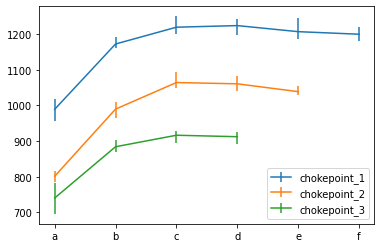

In [22]:
#plot with errobar
X=['a','b','c','d','e','f']
linevars ={
    'chokepoint_1':X,
    'chokepoint_2':X[:-1],
    'chokepoint_3':X[:-2]
}

for groupname,line in linevars.items():       
    Y=[]
    E=[]
    for l in line:
        mapname = groupname+'_'+l+'.map'
        scores = d[mapname]
        y = sum(scores)/len(scores)
        negerror = y -min(scores)
        poserror = max(scores)-y
        Y.append(y)
        E.append([negerror,poserror])  
    
    #Transpose 
    E = list(map(list, zip(*E))) 
    plt.errorbar(line,Y, yerr=E, label=groupname )

plt.legend()
plt.savefig('chokepoint_graph.png')
plt.show()


In [23]:
#get exit dims values - name:[scores]

edscores =[(float(row[17]), row[2]) for row in rows if 'exit_dims' in row[2]]
d ={}
for score, name in edscores:
    if name not in d:
        d[name] = []
    d[name].append(score)    
print(d)


{'exit_dims_2_a.map': [507.0, 476.0, 503.0, 494.0, 486.0, 484.0, 484.0, 502.0, 471.0, 486.0], 'exit_dims_2_b.map': [469.0, 470.0, 471.0, 468.0, 501.0, 482.0, 490.0, 473.0, 467.0, 504.0], 'exit_dims_2_c.map': [479.0, 478.0, 493.0, 468.0, 480.0, 496.0, 529.0, 507.0, 489.0, 498.0], 'exit_dims_4_a.map': [348.0, 349.0, 353.0, 349.0, 380.0, 364.0, 373.0, 368.0, 352.0, 356.0], 'exit_dims_4_b.map': [321.0, 342.0, 313.0, 325.0, 341.0, 341.0, 317.0, 330.0, 312.0, 325.0], 'exit_dims_4_c.map': [336.0, 328.0, 334.0, 352.0, 347.0, 349.0, 358.0, 362.0, 351.0, 351.0], 'exit_dims_6_a.map': [296.0, 297.0, 306.0, 300.0, 298.0, 305.0, 293.0, 304.0, 295.0, 303.0], 'exit_dims_6_b.map': [267.0, 267.0, 265.0, 269.0, 267.0, 268.0, 263.0, 267.0, 267.0, 271.0], 'exit_dims_6_c.map': [269.0, 289.0, 279.0, 267.0, 272.0, 278.0, 277.0, 258.0, 286.0, 269.0], 'exit_dims_8_a.map': [270.0, 270.0, 274.0, 263.0, 269.0, 266.0, 270.0, 276.0, 283.0, 274.0], 'exit_dims_8_b.map': [223.0, 234.0, 240.0, 240.0, 230.0, 239.0, 239.0

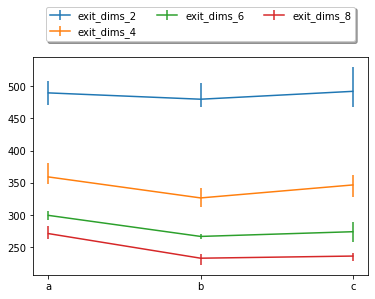

In [28]:
#plot with errobar
X=['a','b','c']
linevars =[
    'exit_dims_2',
    'exit_dims_4',
    'exit_dims_6',
    'exit_dims_8',

]
for groupname in linevars:       
    Y=[]
    E=[]
    for l in X:
        mapname = groupname+'_'+l+'.map'
        scores = d[mapname]
        y = sum(scores)/len(scores)
        negerror = y -min(scores)
        poserror = max(scores)-y
        Y.append(y)
        E.append([negerror,poserror])  
        
    #Transpose     
    E = list(map(list, zip(*E))) 
    plt.errorbar(X,Y, yerr=E, label=groupname )



plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.savefig('exit_dims_graph.png')
plt.show()
